In [1]:
import pandas as pd
#import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import scipy
import sklearn
import copy
from tabulate import tabulate

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/'
DATASET_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/'
Baseline_DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/Baselines/'
Aggregate_DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/Aggregates/'

Mounted at /content/drive


In [2]:
import time

#csvName = '14456d07da6db5da228beff3ad356f824e4cd09a8d6771089eb26a862526ac9a'
#csvName = 'cd05d7b4445349ee645ea290586fd28c0c675a155eb1522485535c5c0329a908'
csvName = '36bc568292ec360f9cc2f4431fa0db953ce8714cdb1b165f4ec68ca54e7fe2be'

multiSeriesMain = pd.read_csv(DATA_PATH+csvName+'.csv')
multiSeriesMain = multiSeriesMain.loc[:, ~multiSeriesMain.columns.str.contains('^Unnamed')].astype(float).reset_index(drop=True)

In [3]:
csvName = '13Bogo'
csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bogoArray = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = '13Bubble'
csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bubbleArray = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

<Axes: >

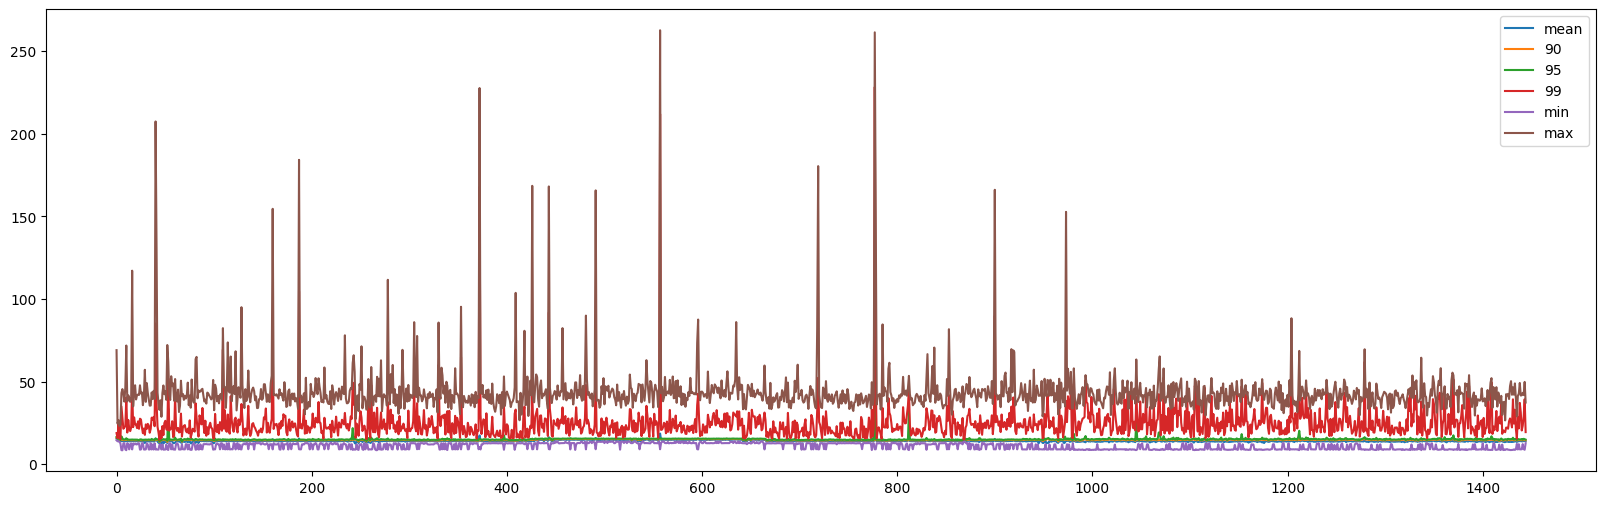

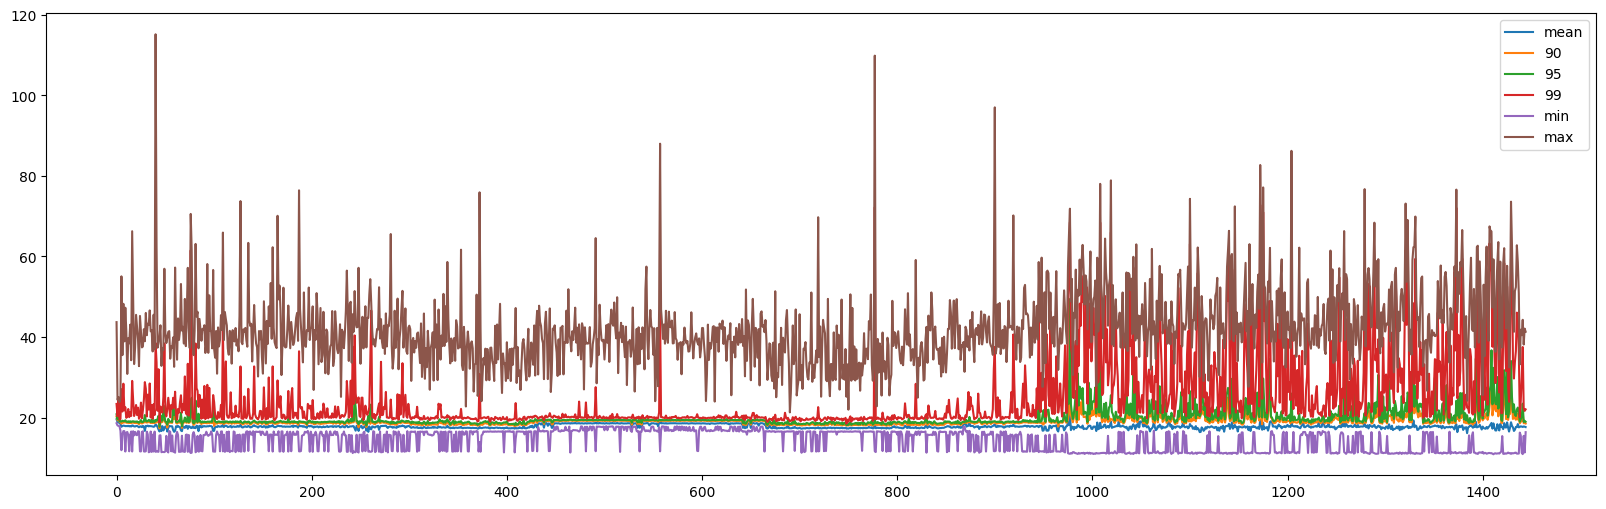

In [4]:
startTime = int(bubbleArray[1].iloc[0:1])
endTime = int(bubbleArray[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyFive = []
ninetyNine = []
mins = []
maxs = []
SLA_Violations = []


for i in range(maxTime):
  means.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].mean())
  nintieth.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyFive.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].quantile(0.95))
  ninetyNine.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].quantile(0.99))
  mins.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].min())
  maxs.append(bubbleArray[2][(bubbleArray[1] >= startTime+60*(i)) & (bubbleArray[1] < startTime+60*(1+i))].max())

bubbleBase = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine,mins,maxs]), index = ['mean', '90','95','99','min','max'])

startTime = int(bogoArray[1].iloc[0:1])
endTime = int(bogoArray[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyFive = []
ninetyNine = []
mins = []
maxs = []

for i in range(maxTime):
  means.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].mean())
  nintieth.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyFive.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].quantile(0.95))
  ninetyNine.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].quantile(0.99))
  mins.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].min())
  maxs.append(bogoArray[2][(bogoArray[1] >= startTime+60*(i)) & (bogoArray[1] < startTime+60*(1+i))].max())
bogoBase = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine,mins,maxs]), index = ['mean', '90','95','99','min','max'])

bogoBase.T.plot()
bubbleBase.T.plot()

<Axes: >

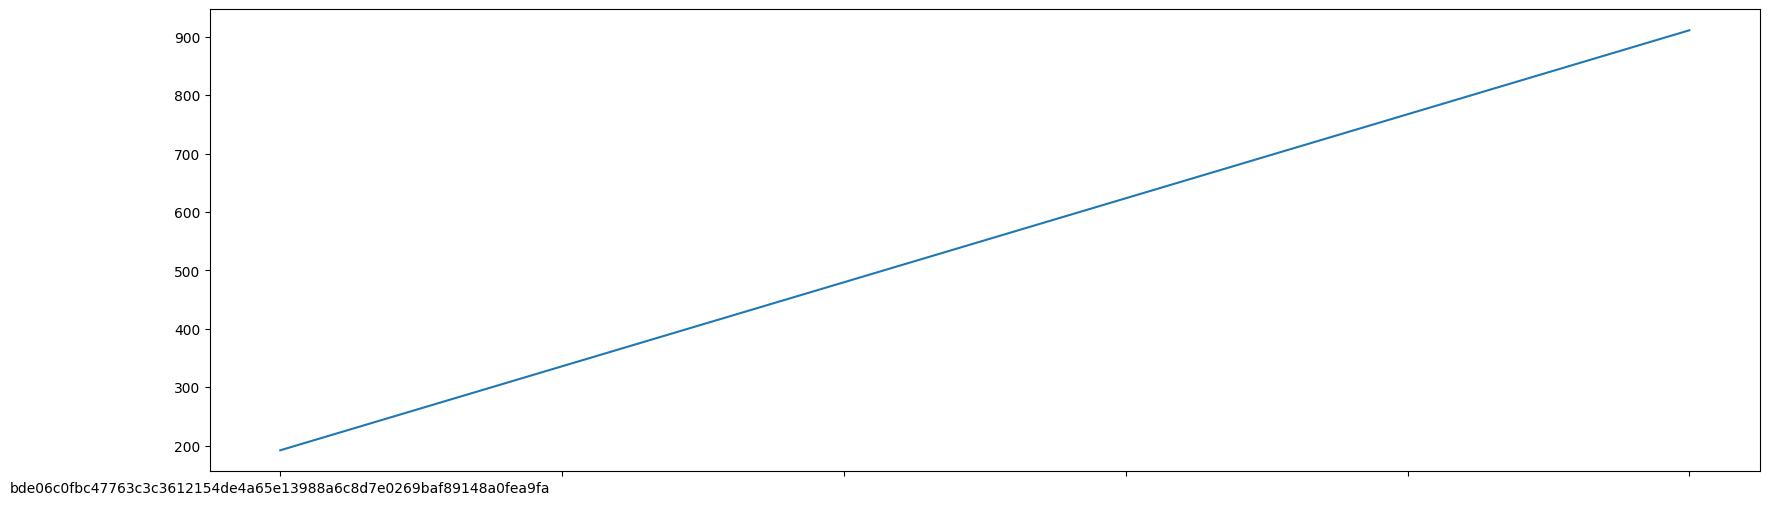

In [5]:
multiSeriesMain.loc[0].iloc[0:1440].plot()

In [6]:
csvName = '24Hour15min5Clust'
csvName2 = False

csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])

bogoArrayClust = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
bubbleArrayClust = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
if csvName2:
  csvArray2 = pd.read_csv(Aggregate_DATA_PATH+csvName2+'.csv', header=None, usecols=[0,1,2,])

  bogoArrayClust2 = csvArray2[csvArray2[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  bubbleArrayClust2 = csvArray2[csvArray2[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

clusterIndices = [[424, 425, 426, 427, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 253, 255, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1234, 1235, 1236, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425], [293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863], [344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 428, 429, 430, 635, 636, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773]]
windowSize = 15
warmup = 5
warmupR = 5
timeR = windowSize+warmupR+1

<ipython-input-6-0b1a9608cc98>:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])


<Axes: >

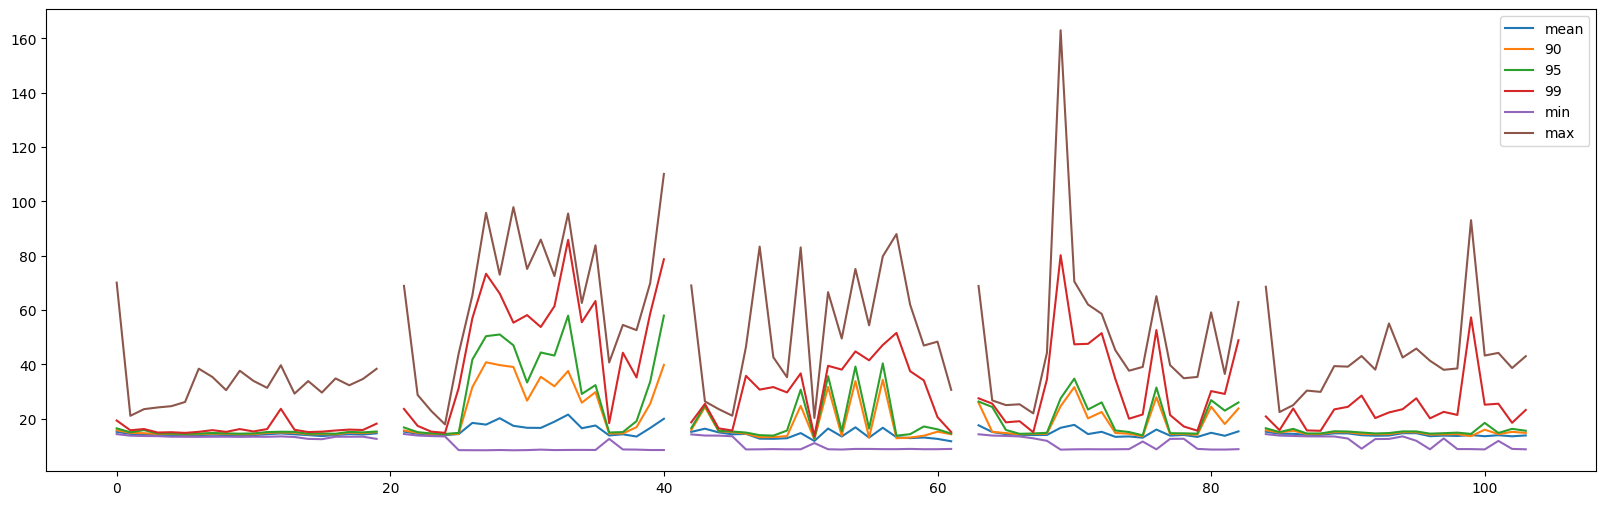

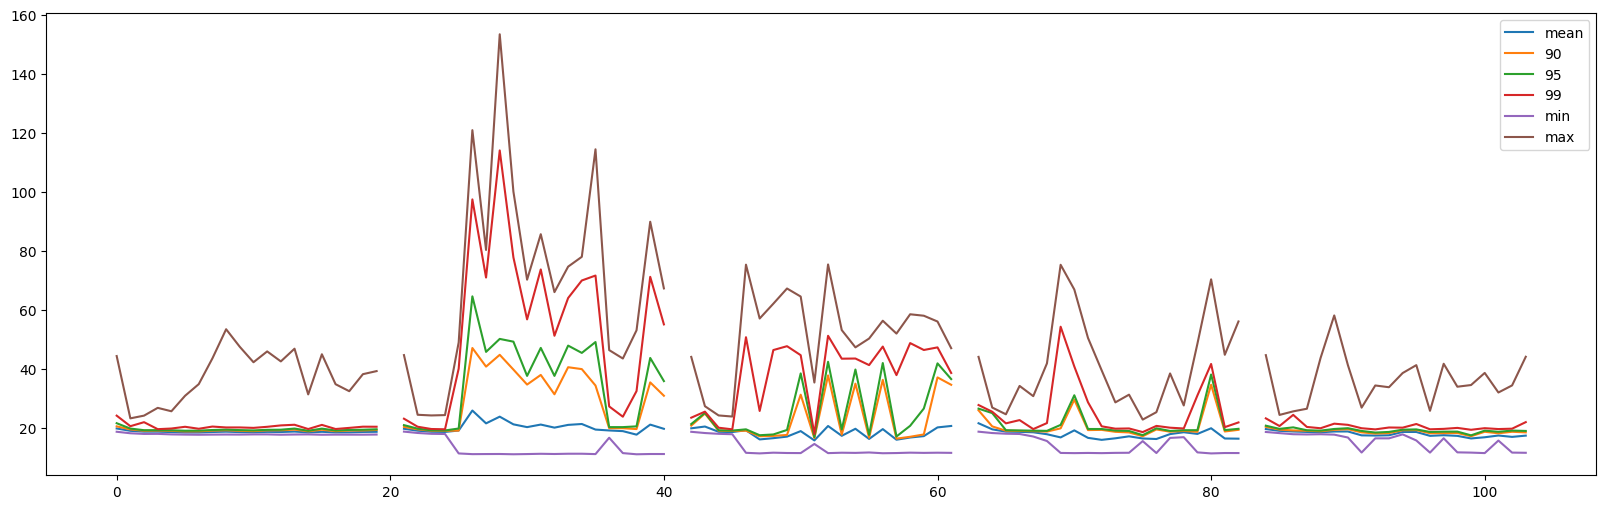

In [7]:
startTime = int(bubbleArrayClust[1].iloc[0:1])
endTime = int(bubbleArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyFive = []
ninetyNine = []
mins = []
maxs = []

for i in range(maxTime):
  means.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].mean())
  nintieth.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyFive.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].quantile(0.95))
  ninetyNine.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].quantile(0.99))
  mins.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].min())
  maxs.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(1+i))].max())
bubbleClust = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine,mins,maxs]), index = ['mean', '90','95','99','min','max'])

startTime = int(bogoArrayClust[1].iloc[0:1])
endTime = int(bogoArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyFive = []
ninetyNine = []
mins = []
maxs = []


for i in range(maxTime):
  means.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].mean())
  nintieth.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyFive.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].quantile(0.95))
  ninetyNine.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].quantile(0.99))
  mins.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].min())
  maxs.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(1+i))].max())
bogoClust = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine,mins,maxs]), index = ['mean', '90','95','99','min','max'])

bogoClust.T.plot()
bubbleClust.T.plot()

----  -------  --------  --------  ---------  --------
       0         1        2          3         4
Mean  14.1226   17.3526  13.6668    14.6107   13.9755
90    14.6631   31.5656  15.5643    21.1492   14.7771
95    14.926    41.3661  27.5023    25.7918   15.2668
99    15.8724   65.1826  41.0734    39.302    25.4503
Min   12.4584    8.3795   8.65546    8.61648   8.69609
Max   39.6855  110.073   87.9538   162.964    93.0713
----  -------  --------  --------  ---------  --------


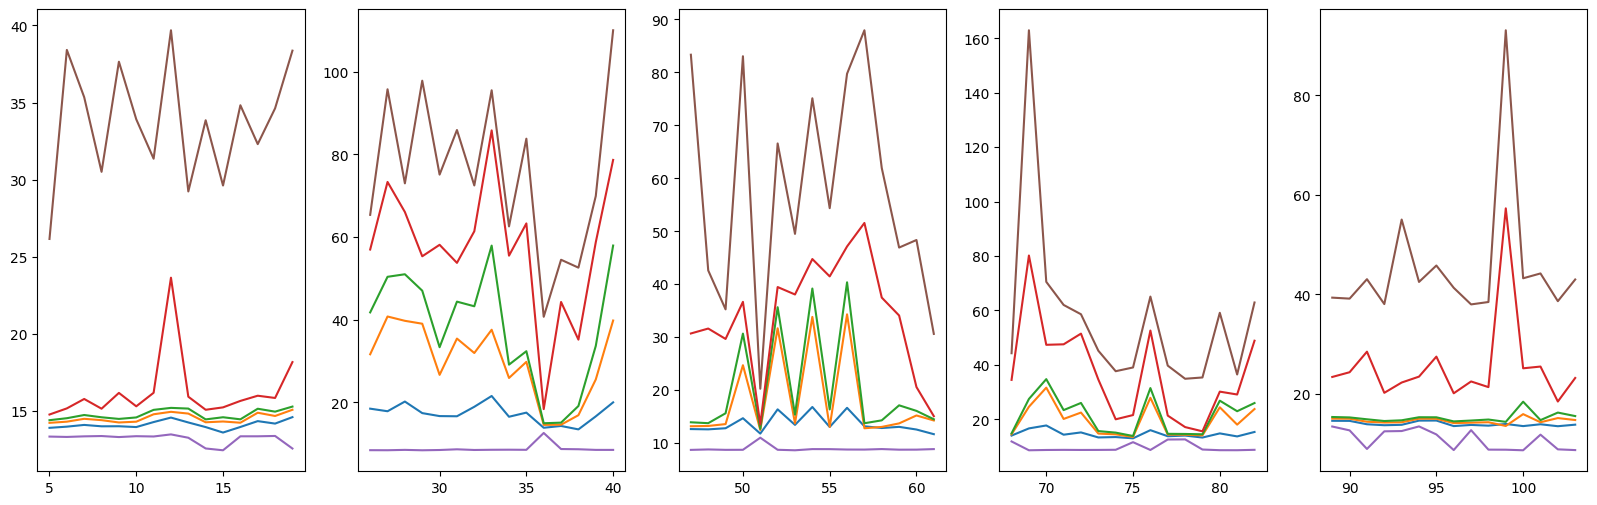

In [8]:
startTime = int(bogoArrayClust[1].iloc[0:1])
endTime = int(bogoArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)

top = ['']
tMean = ['Mean']
t90 = ['90']
t95 = ['95']
t99 = ['99']
tMin = ['Min']
tMax = ['Max']

for i in range(len(clusterIndices)):
  plt.subplot(int(len(clusterIndices)/5), 5, i+1)

  top.append(i)
  tMean.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bogoArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].mean())
  t90.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bogoArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].quantile(0.9))
  t95.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bogoArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].quantile(0.95))
  t99.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bogoArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].quantile(0.99))
  tMin.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bogoArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].min())
  tMax.append(bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bogoArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].max())
  if windowSize < 2:
    plt.plot(bogoClust.T.iloc[warmupR+(warmupR*i+(1*i))+(windowSize*i):warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)], marker='o')
  else:
    plt.plot(bogoClust.T.iloc[warmupR+(warmupR*i+(1*i))+(windowSize*i):warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)])
print(tabulate([top,tMean,t90,t95,t99,tMin,tMax]))

----  -------  --------  -------  -------  -------
       0         1        2        3        4
Mean  18.4599   20.7522  17.7577  17.196   17.4766
90    18.9845   36.0845  26.3046  19.3389  18.7543
95    19.2274   44.4705  35.2468  22.814   19.1164
99    20.2171   70.3725  44.8386  36.0264  20.0303
Min   17.5528   10.9269  11.2262  11.2178  11.3272
Max   53.3289  153.348   75.2884  75.1824  58.0052
----  -------  --------  -------  -------  -------


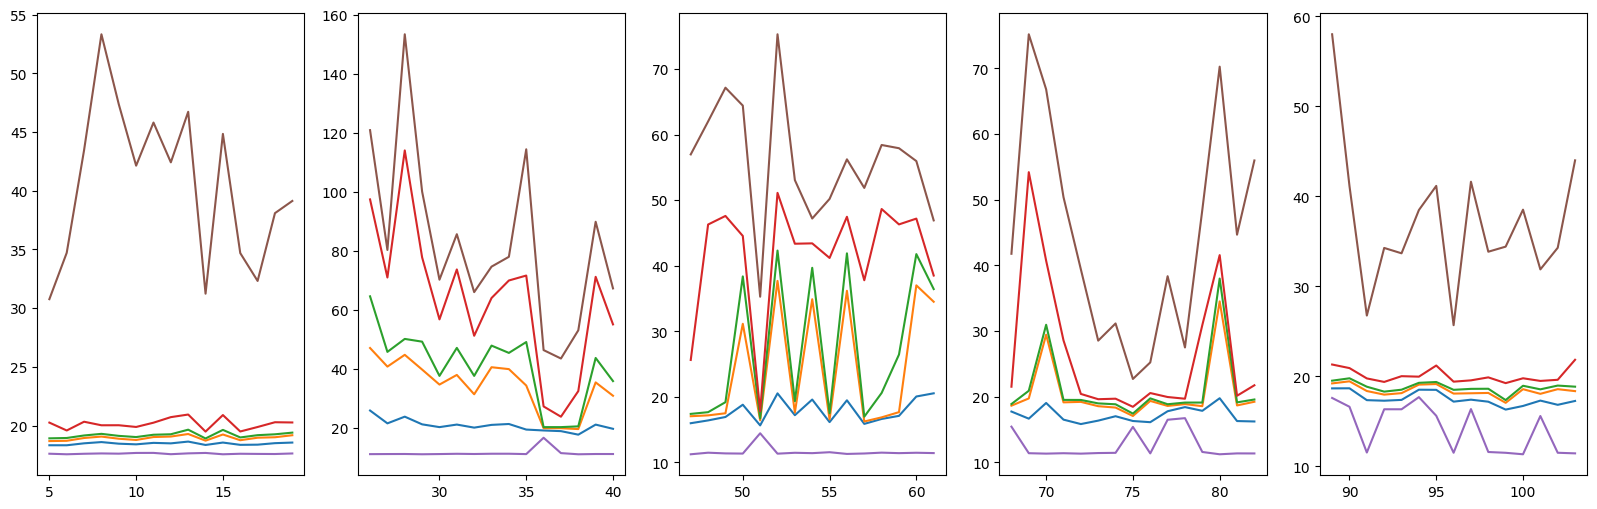

In [9]:
startTime = int(bubbleArrayClust[1].iloc[0:1])
endTime = int(bubbleArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)

top = ['']
tMean = ['Mean']
t90 = ['90']
t95 = ['95']
t99 = ['99']
tMin = ['Min']
tMax = ['Max']

for i in range(len(clusterIndices)):
  plt.subplot(int(len(clusterIndices)/5), 5, i+1)
  top.append(i)
  tMean.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bubbleArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].mean())
  t90.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bubbleArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].quantile(0.9))
  t95.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bubbleArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].quantile(0.95))
  t99.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bubbleArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].quantile(0.99))
  tMin.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bubbleArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].min())
  tMax.append(bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(warmupR+(warmupR*i+(1*i))+(windowSize*i))) & (bubbleArrayClust[1] < startTime+60*(warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)))].max())
  if windowSize < 2:
    plt.plot(bubbleClust.T.iloc[warmupR+(warmupR*i+(1*i))+(windowSize*i):warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)], marker='o')
  else:
    plt.plot(bubbleClust.T.iloc[warmupR+(warmupR*i+(1*i))+(windowSize*i):warmupR+windowSize+(warmupR*i+(1*i))+(windowSize*i)])
print(tabulate([top,tMean,t90,t95,t99,tMin,tMax]))

In [10]:
for index in ['mean', '90','95','99']:
  bogoWindowAvg = ['avg']
  bogoWindowMax = ['max']
  bogoWindowMin = ['min']
  bogoRestartAvg = ['restart']
  weight = ['weight']
  clustCount = 0
  for cluster in clusterIndices:
    tempMin = 99999
    tempMax = 0
    tempSum = 0
    for i in cluster:
      tempWindow = bogoBase.T[index].iloc[warmup+i:warmup+i+windowSize].mean()
      if tempWindow > tempMax:
        tempMax = tempWindow
      if tempWindow < tempMin:
        tempMin = tempWindow
      tempSum += tempWindow
    bogoWindowAvg.append(tempSum/len(cluster))
    bogoWindowMax.append(tempMax)
    bogoWindowMin.append(tempMin)
    bogoRestartAvg.append(bogoClust.T[index].iloc[warmupR+(warmupR*clustCount)+clustCount+(1*clustCount):warmupR+(warmupR*clustCount)+clustCount+windowSize+(1*clustCount)].mean())
    weight.append(('%.2f' % (len(cluster)/(1440-windowSize))))
    clustCount += 1
  header = [index]
  for i in range(len(clusterIndices)):
    header.append(i)
  print('Bogo')
  print(tabulate([header,weight,bogoRestartAvg,bogoWindowAvg,bogoWindowMax,bogoWindowMin]))
  print()

for index in ['mean', '90','95','99']:
  bubbleWindowAvg = ['avg']
  bubbleWindowMax = ['max']
  bubbleWindowMin = ['min']
  bubbleRestartAvg = ['restart']
  weight = ['weight']
  clustCount = 0
  for cluster in clusterIndices:
    tempMin = 99999
    tempMax = 0
    tempSum = 0
    for i in cluster:
      tempWindow = bubbleBase.T[index].iloc[warmup+i:warmup+i+windowSize].mean()
      if tempWindow > tempMax:
        tempMax = tempWindow
      if tempWindow < tempMin:
        tempMin = tempWindow
      tempSum += tempWindow
    bubbleWindowAvg.append(tempSum/len(cluster))
    bubbleWindowMax.append(tempMax)
    bubbleWindowMin.append(tempMin)
    bubbleRestartAvg.append(bubbleClust.T[index].iloc[warmupR+(warmupR*clustCount)+clustCount+(1*clustCount):warmupR+(warmupR*clustCount)+clustCount+windowSize+(1*clustCount)].mean())
    weight.append(('%.2f' % (len(cluster)/(1440-windowSize))))
    clustCount += 1
  header = [index]
  for i in range(len(clusterIndices)):
    header.append(i)
  print('Bubble')
  print(tabulate([header,weight,bubbleRestartAvg,bubbleWindowAvg,bubbleWindowMax,bubbleWindowMin]))
  print()

Bogo
-------  -------  -------  -------  -------  -------
mean      0        1        2        3        4
weight    0.16     0.3      0.3      0.1      0.14
restart  14.1204  14.5762  16.7315  17.3093  15.8129
avg      14.7059  13.8981  13.7047  13.97    14.0086
max      14.9929  14.0902  13.9135  14.1057  14.6291
min      13.9576  13.61    13.4285  13.8591  13.8065
-------  -------  -------  -------  -------  -------

Bogo
-------  -------  -------  -------  -------  -------
90        0        1        2        3        4
weight    0.16     0.3      0.3      0.1      0.14
restart  14.541   15.8905  26.5247  29.9789  21.629
avg      15.0931  14.5836  14.6323  14.4636  14.4768
max      15.1739  14.902   14.8354  14.6351  15.005
min      14.5425  14.4554  14.4062  14.3786  14.3466
-------  -------  -------  -------  -------  -------

Bogo
-------  -------  -------  -------  -------  -------
95        0        1        2        3        4
weight    0.16     0.3      0.3      0.1      0.14

In [11]:
if csvName2:
  startTime = int(bubbleArrayClust2[1].iloc[0:1])
  endTime = int(bubbleArrayClust2[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  means = []
  nintieth = []
  ninetyFive = []
  mins = []
  maxs = []

  for i in range(maxTime):
    means.append(bubbleArrayClust2[2][(bubbleArrayClust2[1] >= startTime+60*(i)) & (bubbleArrayClust2[1] < startTime+60*(1+i))].mean())
    nintieth.append(bubbleArrayClust2[2][(bubbleArrayClust2[1] >= startTime+60*(i)) & (bubbleArrayClust2[1] < startTime+60*(1+i))].quantile(0.9))
    ninetyFive.append(bubbleArrayClust2[2][(bubbleArrayClust2[1] >= startTime+60*(i)) & (bubbleArrayClust2[1] < startTime+60*(1+i))].quantile(0.95))
    mins.append(bubbleArrayClust2[2][(bubbleArrayClust2[1] >= startTime+60*(i)) & (bubbleArrayClust2[1] < startTime+60*(1+i))].min())
    maxs.append(bubbleArrayClust2[2][(bubbleArrayClust2[1] >= startTime+60*(i)) & (bubbleArrayClust2[1] < startTime+60*(1+i))].max())
  bubbleClust2 = pd.DataFrame(np.array([means,nintieth,ninetyFive,mins,maxs]), index = ['mean', '90','95','min','max'])

  startTime = int(bogoArrayClust2[1].iloc[0:1])
  endTime = int(bogoArrayClust2[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  means = []
  nintieth = []
  ninetyFive = []
  mins = []
  maxs = []

  for i in range(maxTime):
    means.append(bogoArrayClust2[2][(bogoArrayClust2[1] >= startTime+60*(i)) & (bogoArrayClust2[1] < startTime+60*(1+i))].mean())
    nintieth.append(bogoArrayClust2[2][(bogoArrayClust2[1] >= startTime+60*(i)) & (bogoArrayClust2[1] < startTime+60*(1+i))].quantile(0.9))
    ninetyFive.append(bogoArrayClust2[2][(bogoArrayClust2[1] >= startTime+60*(i)) & (bogoArrayClust2[1] < startTime+60*(1+i))].quantile(0.95))
    mins.append(bogoArrayClust2[2][(bogoArrayClust2[1] >= startTime+60*(i)) & (bogoArrayClust2[1] < startTime+60*(1+i))].min())
    maxs.append(bogoArrayClust2[2][(bogoArrayClust2[1] >= startTime+60*(i)) & (bogoArrayClust2[1] < startTime+60*(1+i))].max())
  bogoClust2 = pd.DataFrame(np.array([means,nintieth,ninetyFive,mins,maxs]), index = ['mean', '90','95','min','max'])

In [12]:
if csvName2:
  for index in ['mean', '90','95','min','max']:

    numClusters = len(clusterIndices)
    meanBubbleClust = []
    meanBubbleClust2 = []
    for n in range(numClusters):
      if n == 0:
        meanBubbleClust.append(bubbleClust.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
        meanBubbleClust2.append(bubbleClust2.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
      else:
        meanBubbleClust.append(bubbleClust.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
        meanBubbleClust2.append(bubbleClust2.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
    # print("BubbleClust")
    # print(np.array(meanBubbleClust))
    absTemp = 0
    tempSum = 0
    avgSum = 0
    # print("BubbleDiff")
    for n in range(numClusters):
      # print(meanBubbleBase[n]-meanBubbleClust[n])
      tempSum += sum(meanBubbleClust2[n]-meanBubbleClust[n])/windowSize
      absTemp += sum(abs(meanBubbleClust2[n]-meanBubbleClust[n]))/windowSize
      avgSum += sum(meanBubbleClust2[n]+meanBubbleClust[n])/2/windowSize
    print("BubbleAvg " + index)
    BubbleAvgDiff = tempSum/numClusters
    BubbleAbsDiff = absTemp/numClusters
    print(BubbleAvgDiff, (BubbleAbsDiff/(avgSum/numClusters)))

    numClusters = len(clusterIndices)
    meanBogoClust = []
    meanBogoClust2 = []
    for n in range(numClusters):
      if n == 0:
        meanBogoClust.append(bogoClust.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
        meanBogoClust2.append(bogoClust2.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
      else:
        meanBogoClust.append(bogoClust.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
        meanBogoClust2.append(bogoClust2.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
    # print("bogoClust")
    # print(np.array(meanBogoClust))

    absTemp = 0
    tempSum = 0
    avgSum = 0
    # print("BogoDiff")
    for n in range(numClusters):
      # print(meanBogoBase[n]-meanBogoClust[n])
      tempSum += sum(meanBogoClust2[n]-meanBogoClust[n])/windowSize
      absTemp += sum(abs(meanBogoClust2[n]-meanBogoClust[n]))/windowSize
      avgSum += sum(meanBogoClust2[n]+meanBogoClust[n])/2/windowSize
    print("BogoAvg " + index)
    BogoAvgDiff = tempSum/numClusters
    BogoAbsDiff = absTemp/numClusters
    print(BogoAvgDiff, (BogoAbsDiff/(avgSum/numClusters)))
    print('CSV2 COMPARISON')

In [13]:
for index in ['mean', '90','95','min','max']:
  results = []
  for indices in clusterIndices:
    tempResults = []
    for i in indices:
      tempResults.append(bubbleBase.T[index].iloc[warmup+i:warmup+i+windowSize].values)
    results.append(np.array(tempResults))
  meanBubbleBase = []
  for r in results:
    meanBubbleBase.append(np.average(r, axis=0))
  # print("BubbleBase")
  # print(np.array(meanBubbleBase))

  numClusters = len(clusterIndices)
  meanBubbleClust = []
  for n in range(numClusters):
    if n == 0:
      meanBubbleClust.append(bubbleClust.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
    else:
      meanBubbleClust.append(bubbleClust.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
  # print("BubbleClust")
  # print(np.array(meanBubbleClust))
  absTemp = 0
  tempSum = 0
  avgSum = 0
  windowAbsDiff = 0
  windowAvgSum = 0
  # print("BubbleDiff")
  for n in range(numClusters):
    # print(meanBubbleBase[n]-meanBubbleClust[n])
    tempSum += sum(meanBubbleBase[n]-meanBubbleClust[n])/windowSize
    absTemp += sum(abs(meanBubbleBase[n]-meanBubbleClust[n]))/windowSize
    avgSum += sum(meanBubbleBase[n]+meanBubbleClust[n])/2/windowSize
    windowAbsDiff += abs((sum(meanBubbleBase[n])/len(meanBubbleBase[n]))-(sum(meanBubbleClust[n])/len(meanBubbleClust[n])))
    windowAvgSum += ((sum(meanBubbleBase[n])/len(meanBubbleBase[n]))+(sum(meanBubbleClust[n])/len(meanBubbleClust[n])))/2
  print("BubbleAvg " + index)
  BubbleAvgDiff = tempSum/numClusters
  BubbleAbsDiff = absTemp/numClusters
  print(BubbleAvgDiff, avgSum/numClusters, (BubbleAbsDiff/(avgSum/numClusters)),(windowAbsDiff/numClusters)/(windowAvgSum/numClusters))

  results = []
  for indices in clusterIndices:
    tempResults = []
    for i in indices:
      tempResults.append(bogoBase.T[index].iloc[warmup+i:warmup+i+windowSize].values)
    results.append(np.array(tempResults))
  meanBogoBase = []
  for r in results:
    meanBogoBase.append(np.average(r, axis=0))
  # print("bogoBase")
  # print(np.array(meanBogoBase))

  numClusters = len(clusterIndices)
  meanBogoClust = []
  for n in range(numClusters):
    if n == 0:
      meanBogoClust.append(bogoClust.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
    else:
      meanBogoClust.append(bogoClust.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
  # print("bogoClust")
  # print(np.array(meanBogoClust))

  absTemp = 0
  tempSum = 0
  avgSum = 0
  windowAbsDiff = 0
  windowAvgSum = 0
  # print("BogoDiff")
  for n in range(numClusters):
    # print(meanBogoBase[n]-meanBogoClust[n])
    tempSum += sum(meanBogoBase[n]-meanBogoClust[n])/windowSize
    absTemp += sum(abs(meanBogoBase[n]-meanBogoClust[n]))/windowSize
    avgSum += sum(meanBogoBase[n]+meanBogoClust[n])/2/windowSize
    windowAbsDiff += abs((sum(meanBogoBase[n])/len(meanBogoBase[n]))-(sum(meanBogoClust[n])/len(meanBogoClust[n])))
    windowAvgSum += ((sum(meanBogoBase[n])/len(meanBogoBase[n]))+(sum(meanBogoClust[n])/len(meanBogoClust[n])))/2
  print("BogoAvg " + index)
  BogoAvgDiff = tempSum/numClusters
  BogoAbsDiff = absTemp/numClusters
  print(BogoAvgDiff, avgSum/numClusters, (BogoAbsDiff/(avgSum/numClusters)), (windowAbsDiff/numClusters)/(windowAvgSum/numClusters))

BubbleAvg mean
-0.5313995493434189 18.05469614633377 0.06930482278645717 0.03828906258298145
BogoAvg mean
-0.6676600799829904 14.391278445866595 0.09532293368515544 0.06544855737530002
BubbleAvg 90
-4.313646479204127 21.144287741731272 0.24898735692825819 0.2075199553657526
BogoAvg 90
-4.729844075818929 17.014820840757206 0.3174819884654765 0.29096228589563944
BubbleAvg 95
-5.888830362335671 22.56969408883216 0.30235897319440774 0.26346970737250675
BogoAvg 95
-6.916718258563262 18.5903744600517 0.4052176981915597 0.38468423094765164
BubbleAvg min
1.342010478787002 14.145195092726834 0.14214174410612512 0.11624266443837614
BogoAvg min
1.049243840460187 10.805658013563427 0.1398808653585605 0.11130328993382328
BubbleAvg max
-11.328620453157175 46.494824880088075 0.3232745596237067 0.24365336319416428
BogoAvg max
-9.638719221203576 49.09945616273155 0.36862894182280276 0.29528664364494805


In [14]:
for index in ['mean', '90','95','min','max']:
  results = []
  for indices in clusterIndices:
    tempResults = []
    for i in indices:
      tempResults.append(bubbleBase.T[index].iloc[warmup+i:warmup+i+windowSize].values)
    results.append(np.array(tempResults))
  meanBubbleBase = []
  for r in results:
    meanBubbleBase.append(np.average(r, axis=0))
  # print("BubbleBase")
  # print(np.array(meanBubbleBase))

  numClusters = len(clusterIndices)
  meanBubbleClust = []
  for n in range(numClusters):
    if n == 0:
      meanBubbleClust.append(bubbleClust.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
    else:
      meanBubbleClust.append(bubbleClust.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
  # print("BubbleClust")
  # print(np.array(meanBubbleClust))
  absTemp = 0
  tempSum = 0
  avgSum = 0
  # print("BubbleDiff")
  for n in range(numClusters):
    # print(meanBubbleBase[n]-meanBubbleClust[n])
    tempSum += sum(meanBubbleBase[n]-meanBubbleClust[n])/windowSize
    absTemp += sum(abs(meanBubbleBase[n]-meanBubbleClust[n]))/windowSize
    avgSum += sum(meanBubbleBase[n]+meanBubbleClust[n])/2/windowSize
  print("BubbleAvg " + index)
  BubbleAvgDiff = tempSum/numClusters
  BubbleAbsDiff = absTemp/numClusters
  print(BubbleAvgDiff, avgSum/numClusters, (BubbleAbsDiff/(avgSum/numClusters)))

  results = []
  for indices in clusterIndices:
    tempResults = []
    for i in indices:
      tempResults.append(bogoBase.T[index].iloc[warmup+i:warmup+i+windowSize].values)
    results.append(np.array(tempResults))
  meanBogoBase = []
  for r in results:
    meanBogoBase.append(np.average(r, axis=0))
  # print("bogoBase")
  # print(np.array(meanBogoBase))

  numClusters = len(clusterIndices)
  meanBogoClust = []
  for n in range(numClusters):
    if n == 0:
      meanBogoClust.append(bogoClust.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
    else:
      meanBogoClust.append(bogoClust.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
  # print("bogoClust")
  # print(np.array(meanBogoClust))

  absTemp = 0
  tempSum = 0
  avgSum = 0
  # print("BogoDiff")
  for n in range(numClusters):
    # print(meanBogoBase[n]-meanBogoClust[n])
    tempSum += sum(meanBogoBase[n]-meanBogoClust[n])/windowSize
    absTemp += sum(abs(meanBogoBase[n]-meanBogoClust[n]))/windowSize
    avgSum += sum(meanBogoBase[n]+meanBogoClust[n])/2/windowSize
  print("BogoAvg " + index)
  BogoAvgDiff = tempSum/numClusters
  BogoAbsDiff = absTemp/numClusters
  print(BogoAvgDiff, avgSum/numClusters, (BogoAbsDiff/(avgSum/numClusters)))

BubbleAvg mean
-0.5313995493434189 18.05469614633377 0.06930482278645717
BogoAvg mean
-0.6676600799829904 14.391278445866595 0.09532293368515544
BubbleAvg 90
-4.313646479204127 21.144287741731272 0.24898735692825819
BogoAvg 90
-4.729844075818929 17.014820840757206 0.3174819884654765
BubbleAvg 95
-5.888830362335671 22.56969408883216 0.30235897319440774
BogoAvg 95
-6.916718258563262 18.5903744600517 0.4052176981915597
BubbleAvg min
1.342010478787002 14.145195092726834 0.14214174410612512
BogoAvg min
1.049243840460187 10.805658013563427 0.1398808653585605
BubbleAvg max
-11.328620453157175 46.494824880088075 0.3232745596237067
BogoAvg max
-9.638719221203576 49.09945616273155 0.36862894182280276


In [15]:
if csvName2:
  for index in ['mean', '90','95','min','max']:
    results = []
    for indices in clusterIndices:
      tempResults = []
      for i in indices:
        tempResults.append(bubbleBase.T[index].iloc[warmup+i:warmup+i+windowSize].values)
      results.append(np.array(tempResults))
    meanBubbleBase = []
    for r in results:
      meanBubbleBase.append(np.average(r, axis=0))
    # print("BubbleBase")
    # print(np.array(meanBubbleBase))

    numClusters = len(clusterIndices)
    meanBubbleClust = []
    meanBubbleClust2 = []
    for n in range(numClusters):
      if n == 0:
        meanBubbleClust.append(bubbleClust.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
        meanBubbleClust2.append(bubbleClust2.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
      else:
        meanBubbleClust.append(bubbleClust.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
        meanBubbleClust2.append(bubbleClust2.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
    # print("BubbleClust")
    # print(np.array(meanBubbleClust))
    absTemp = 0
    tempSum = 0
    avgSum = 0
    # print("BubbleDiff")
    for n in range(numClusters):
      # print(meanBubbleBase[n]-meanBubbleClust[n])
      if abs(sum(meanBubbleBase[n]-meanBubbleClust[n])) < abs(sum(meanBubbleBase[n]-meanBubbleClust2[n])):
        tempSum += sum(meanBubbleBase[n]-meanBubbleClust[n])/windowSize
        absTemp += sum(abs(meanBubbleBase[n]-meanBubbleClust[n]))/windowSize
        avgSum += sum(meanBubbleBase[n]+meanBubbleClust[n])/2/windowSize
      else:
        tempSum += sum(meanBubbleBase[n]-meanBubbleClust2[n])/windowSize
        absTemp += sum(abs(meanBubbleBase[n]-meanBubbleClust2[n]))/windowSize
        avgSum += sum(meanBubbleBase[n]+meanBubbleClust2[n])/2/windowSize
    print("BubbleAvg " + index)
    BubbleAvgDiff = tempSum/numClusters
    BubbleAbsDiff = absTemp/numClusters
    print(BubbleAvgDiff, BubbleAbsDiff, avgSum/numClusters, (BubbleAbsDiff/(avgSum/numClusters)))

    results = []
    for indices in clusterIndices:
      tempResults = []
      for i in indices:
        tempResults.append(bogoBase.T[index].iloc[warmup+i:warmup+i+windowSize].values)
      results.append(np.array(tempResults))
    meanBogoBase = []
    for r in results:
      meanBogoBase.append(np.average(r, axis=0))
    # print("bogoBase")
    # print(np.array(meanBogoBase))

    numClusters = len(clusterIndices)
    meanBogoClust = []
    meanBogoClust2 = []
    for n in range(numClusters):
      if n == 0:
        meanBogoClust.append(bogoClust.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
        meanBogoClust2.append(bogoClust2.T[index].iloc[warmupR+n:warmupR+n+windowSize].values)
      else:
        meanBogoClust.append(bogoClust.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
        meanBogoClust2.append(bogoClust2.T[index].iloc[warmupR+(n*timeR):warmupR+(n*timeR)+windowSize].values)
    # print("bogoClust")
    # print(np.array(meanBogoClust))

    absTemp = 0
    tempSum = 0
    avgSum = 0
    # print("BogoDiff")
    for n in range(numClusters):
      # print(meanBogoBase[n]-meanBogoClust[n])
      if abs(sum(meanBogoBase[n]-meanBogoClust[n])) < abs(sum(meanBogoBase[n]-meanBogoClust2[n])):
        tempSum += sum(meanBogoBase[n]-meanBogoClust[n])/windowSize
        absTemp += sum(abs(meanBogoBase[n]-meanBogoClust[n]))/windowSize
        avgSum += (sum(meanBogoBase[n]+meanBogoClust[n])/2)/windowSize
      else:
        tempSum += sum(meanBogoBase[n]-meanBogoClust2[n])/windowSize
        absTemp += sum(abs(meanBogoBase[n]-meanBogoClust2[n]))/windowSize
        avgSum += (sum(meanBogoBase[n]+meanBogoClust2[n])/2)/windowSize
    print("BogoAvg " + index)
    BogoAvgDiff = tempSum/numClusters
    BogoAbsDiff = absTemp/numClusters
    print(BogoAvgDiff, BogoAbsDiff, avgSum/numClusters, (BogoAbsDiff/(avgSum/numClusters)))

In [16]:
count = 0
pValues = []
for indices in clusterIndices:
  if count == 0:
    temp = []
    for i in indices:
      stat, p= scipy.stats.ttest_rel(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], bogoClust.T['mean'].iloc[warmupR:warmupR+windowSize])
      temp.append(p)
  else:
    temp = []
    for i in indices:
      stat, p= scipy.stats.ttest_rel(bogoBase.T['mean'].iloc[warmup+i:warmup+i+windowSize], bogoClust.T['mean'].iloc[warmupR+(count*timeR):warmupR+(count*timeR)+windowSize])
      temp.append(p)
  pValues.append(temp)
  count += 1
for p in pValues:
  bonferroniCorr = 0.05/len(p)
  pos = 0
  for individualP in p:
    if individualP >= bonferroniCorr:
      pos += 1
  print(pos/len(p))

0.30303030303030304
0.044186046511627906
1.0
1.0
1.0


In [17]:
startTime = int(bubbleArray[1].iloc[0:1])
bubbleBaseAll = bubbleArray[2][(bubbleArray[1] >= startTime+60*(warmup))].values

startTime = int(bogoArray[1].iloc[0:1])
bogoBaseAll = bogoArray[2][(bogoArray[1] >= startTime+60*(warmup))].values

restart_intervals = []
for n in range(numClusters):
  if n == 0:
    restart_intervals.append(warmupR+n)
  else:
    restart_intervals.append(warmupR+(n*timeR))

startTime = int(bubbleArrayClust[1].iloc[0:1])
endTime = int(bubbleArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
bubbleClustAll = []
for i in restart_intervals:
  bubbleClustAll += bubbleArrayClust[2][(bubbleArrayClust[1] >= startTime+60*(i)) & (bubbleArrayClust[1] < startTime+60*(windowSize+i))].tolist()
bubbleClustAll = np.array(bubbleClustAll)

startTime = int(bogoArrayClust[1].iloc[0:1])
endTime = int(bogoArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
bogoClustAll = []
for i in restart_intervals:
  bogoClustAll += bogoArrayClust[2][(bogoArrayClust[1] >= startTime+60*(i)) & (bogoArrayClust[1] < startTime+60*(windowSize+i))].tolist()
bogoClustAll = np.array(bogoClustAll)


print(scipy.stats.f_oneway(bubbleBaseAll,bubbleClustAll))
print(scipy.stats.norm.interval(0.95, sum(bubbleBaseAll)/len(bubbleBaseAll), np.std(bubbleBaseAll)))
print(scipy.stats.norm.interval(0.95, sum(bubbleClustAll)/len(bubbleClustAll), np.std(bubbleClustAll)))

print(scipy.stats.f_oneway(bogoBaseAll,bogoClustAll))
print(scipy.stats.norm.interval(0.95, sum(bogoBaseAll)/len(bogoBaseAll), np.std(bogoBaseAll)))
print(scipy.stats.norm.interval(0.95, sum(bogoClustAll)/len(bogoClustAll), np.std(bogoClustAll)))
print(bogoBaseAll.min(),bogoClustAll.min())

F_onewayResult(statistic=8841.684211269898, pvalue=0.0)
(12.446323314497416, 23.107261965722113)
(4.7787680209603725, 31.930529435730648)
F_onewayResult(statistic=20713.7935969428, pvalue=0.0)
(8.171043576820614, 19.79519395131355)
(1.037731094586844, 28.532510324446818)
8.379483 8.379502


In [18]:
check = False
if check:
  csvName = 'Bogo2'
  csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
  bogoArray2 = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  csvName = 'Bubble2'
  csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
  bubbleArray2 = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

  startTime = int(bubbleArray2[1].iloc[0:1])
  endTime = int(bubbleArray2[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  means = []
  nintieth = []
  ninetyFive = []
  mins = []
  maxs = []


  for i in range(maxTime):
    means.append(bubbleArray2[2][(bubbleArray2[1] >= startTime+60*(i)) & (bubbleArray2[1] < startTime+60*(1+i))].mean())
    nintieth.append(bubbleArray2[2][(bubbleArray2[1] >= startTime+60*(i)) & (bubbleArray2[1] < startTime+60*(1+i))].quantile(0.9))
    ninetyFive.append(bubbleArray2[2][(bubbleArray2[1] >= startTime+60*(i)) & (bubbleArray2[1] < startTime+60*(1+i))].quantile(0.95))
    mins.append(bubbleArray2[2][(bubbleArray2[1] >= startTime+60*(i)) & (bubbleArray2[1] < startTime+60*(1+i))].min())
    maxs.append(bubbleArray2[2][(bubbleArray2[1] >= startTime+60*(i)) & (bubbleArray2[1] < startTime+60*(1+i))].max())
  bubbleBase2 = pd.DataFrame(np.array([means,nintieth,ninetyFive,mins,maxs]), index = ['mean', '90','95','min','max'])

  startTime = int(bogoArray2[1].iloc[0:1])
  endTime = int(bogoArray2[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  means = []
  nintieth = []
  ninetyFive = []
  mins = []
  maxs = []

  for i in range(maxTime):
    means.append(bogoArray2[2][(bogoArray2[1] >= startTime+60*(i)) & (bogoArray2[1] < startTime+60*(1+i))].mean())
    nintieth.append(bogoArray2[2][(bogoArray2[1] >= startTime+60*(i)) & (bogoArray2[1] < startTime+60*(1+i))].quantile(0.9))
    ninetyFive.append(bogoArray2[2][(bogoArray2[1] >= startTime+60*(i)) & (bogoArray2[1] < startTime+60*(1+i))].quantile(0.95))
    mins.append(bogoArray2[2][(bogoArray2[1] >= startTime+60*(i)) & (bogoArray2[1] < startTime+60*(1+i))].min())
    maxs.append(bogoArray2[2][(bogoArray2[1] >= startTime+60*(i)) & (bogoArray2[1] < startTime+60*(1+i))].max())
  bogoBase2 = pd.DataFrame(np.array([means,nintieth,ninetyFive,mins,maxs]), index = ['mean', '90','95','min','max'])

In [19]:
if check:
  for index in ['mean', '90','95','min','max']:
    results = []
    results2 = []
    for indices in clusterIndices:
      tempResults = []
      tempResults2 = []
      for i in indices:
        tempResults.append(bubbleBase.T[index].iloc[warmup+i:warmup+i+windowSize].values)
        tempResults2.append(bubbleBase2.T[index].iloc[warmup+i:warmup+i+windowSize].values)
      results.append(np.array(tempResults))
      results2.append(np.array(tempResults2))
    meanBubbleBase2 = []
    meanBubbleBase = []
    for r in results:
      meanBubbleBase.append(np.average(r, axis=0))
    for r in results2:
      meanBubbleBase2.append(np.average(r, axis=0))
    # print("BubbleBase")
    # print(np.array(meanBubbleBase))

    absTemp = 0
    tempSum = 0
    avgSum = 0
    # print("BubbleDiff")
    for n in range(numClusters):
      # print(meanBubbleBase[n]-meanBubbleClust[n])
      tempSum += sum(meanBubbleBase[n]-meanBubbleBase2[n])/windowSize
      absTemp += sum(abs(meanBubbleBase[n]-meanBubbleBase2[n]))/windowSize
      avgSum += sum(meanBubbleBase[n]+meanBubbleBase2[n])/2/windowSize
    print("BubbleAvg " + index)
    BubbleAvgDiff = tempSum/numClusters
    BubbleAbsDiff = absTemp/numClusters
    print(BubbleAvgDiff, (BubbleAbsDiff/(avgSum/numClusters)))

    results = []
    results2 = []
    for indices in clusterIndices:
      tempResults = []
      tempResults2 = []
      for i in indices:
        tempResults.append(bogoBase.T[index].iloc[warmup+i:warmup+i+windowSize].values)
        tempResults2.append(bogoBase2.T[index].iloc[warmup+i:warmup+i+windowSize].values)
      results.append(np.array(tempResults))
      results2.append(np.array(tempResults2))
    meanBogoBase = []
    meanBogoBase2 = []
    for r in results:
      meanBogoBase.append(np.average(r, axis=0))
    for r in results2:
      meanBogoBase2.append(np.average(r, axis=0))
    # print("bogoBase")
    # print(np.array(meanBogoBase))

    absTemp = 0
    tempSum = 0
    avgSum = 0
    # print("BogoDiff")
    for n in range(numClusters):
      # print(meanBogoBase[n]-meanBogoClust[n])
      tempSum += sum(meanBogoBase[n]-meanBogoBase2[n])/windowSize
      absTemp += sum(abs(meanBogoBase[n]-meanBogoBase2[n]))/windowSize
      avgSum += sum((meanBogoBase[n]+meanBogoBase2[n])/2)/windowSize
      #print(tempSum,absTemp,avgSum)
    print("BogoAvg " + index)
    BogoAvgDiff = tempSum/numClusters
    BogoAbsDiff = absTemp/numClusters
    print(BogoAvgDiff, (BogoAbsDiff/(avgSum/numClusters)))

In [20]:
if check:
  for index in ['mean', '90','95','min','max']:
    avgDiffAbs = sum(abs(bubbleBase.T[index].iloc[warmup:].values - bubbleBase2.T[index].iloc[warmup:].values))/len(bubbleBase2.T[index].iloc[warmup:].values)
    avg = sum(bubbleBase.T[index].iloc[warmup:].values + bubbleBase2.T[index].iloc[warmup:].values)/2/len(bubbleBase2.T[index].iloc[warmup:].values)

    percentDiff = avgDiffAbs/avg

    print(avgDiffAbs, avg, percentDiff)

    avgDiffAbs = sum(abs(bogoBase.T[index].iloc[warmup:].values - bogoBase2.T[index].iloc[warmup:].values))/len(bogoBase2.T[index].iloc[warmup:].values)
    avg = sum(bogoBase.T[index].iloc[warmup:].values + bogoBase2.T[index].iloc[warmup:].values)/2/len(bogoBase2.T[index].iloc[warmup:].values)

    percentDiff = avgDiffAbs/avg

    print(avgDiffAbs, avg, percentDiff)

    print(len(bogoBase2.T[index].iloc[warmup:].values),len(bogoBase.T[index].iloc[warmup:].values))

